In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sidetable
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv('attacks_todos.csv', index_col= 0)
df.head(1)

,Case Number,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Time,Species,Fatal (Y/N),Injury,Date
0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018


# EJERCICIO 1: 
Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.

In [3]:
plt.rcParams["figure.figsize"] = (30,8)

# EJERCICIO 2: 
Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximación a nuestras hipótesis:

 - ##### 2.1: ¿Cuántos ataques hubo por pais? ¿Se puede ver algo claro si ploteamos todos los paises? En caso de que no, seleccionad solo los 10 paises con más ataques y volved a hacer el plot.

In [4]:
df['Sex '] = df['Sex '].astype(str)
df['Country'] = df['Country'].astype(str)

<font color='teal'> Al hacer una gráfica con todos los países no se apreciaba nada en claro, por lo que la limitamos a los 10 países con más ataques de tiburones.</font>

In [5]:
cantidad_ataques = df['Country'].value_counts()[:10]
cantidad_ataques

USA                 2222
AUSTRALIA           1335
SOUTH AFRICA         577
PAPUA NEW GUINEA     134
NEW ZEALAND          127
BRAZIL               112
BAHAMAS              109
MEXICO                88
ITALY                 70
FIJI                  62
Name: Country, dtype: int64

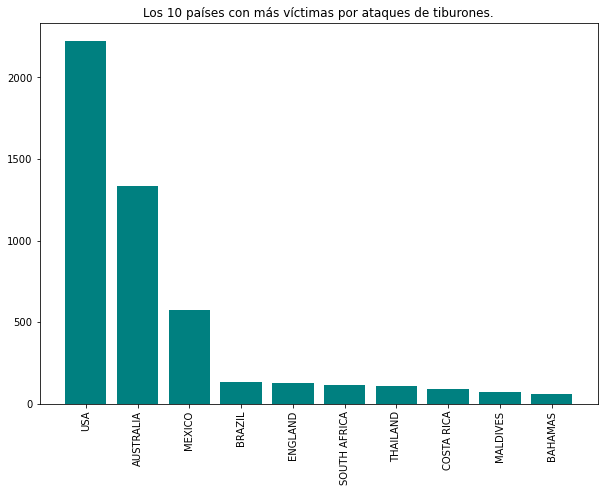

In [6]:
x= df['Country'].unique()[:10]
y = df['Country'].value_counts()[:10]

plt.figure()
plt.xticks(rotation='vertical')
plt.title('Los 10 países con más víctimas por ataques de tiburones.')
plt.bar(x,y, color ='teal')
plt.gcf().set_size_inches(10, 7)

plt.show()

<font color='teal'> Vemos claramente que EEUU es el país con más ataques con diferencia, seguido de Australia y México🦈.</font>

 - ##### 2.2: Usando el DataFrame de los 10 paises con más ataques, ¿hay diferencias entre sexos en esos paises?

<font color='pink'> Primero hacemos un group by para ver los datos de los países y la cantidad de víctimas por sexo y poder compararlas luego con la grafíca.</font>

In [7]:
df_genero_pais = df.groupby(["Country", 'Sex '])['Sex '].count().sort_values(ascending=False)[:10]
df_genero_pais

Country           Sex 
USA               M       1787
AUSTRALIA         M       1104
SOUTH AFRICA      M        487
USA               F        336
AUSTRALIA         nan      141
PAPUA NEW GUINEA  M        108
NEW ZEALAND       M        100
USA               nan       97
BRAZIL            M         93
BAHAMAS           M         92
Name: Sex , dtype: int64

<font color='pink'> Con el método .unique() vemos que hay más tipos de sexos por lo que procedemos a reasignarlos como 'Unknown' para reflejarlos en la gráfica y que quede más clara.</font>

In [8]:
df['Sex '].unique()

array(['F', 'M', 'nan', 'M ', 'lli', 'N', '.'], dtype=object)

In [9]:
sexos = []

for value in df['Sex ']:
    if value == 'M':
        sexos.append('M')
    elif value == 'F':
        sexos.append('F')
    else:
        sexos.append('Unknown')

In [10]:
df['Sex_new'] = sexos

In [11]:
df.sample()

,Case Number,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Time,Species,Fatal (Y/N),Injury,Date,Sex_new
4116,1958.12.27,1958.0,Unprovoked,PAPUA NEW GUINEA,Madang Province,Taludig,NaN,Anonymous,nan,NaN,NaN,NaN,N,Hip bitten,27-Dec-1958,Unknown


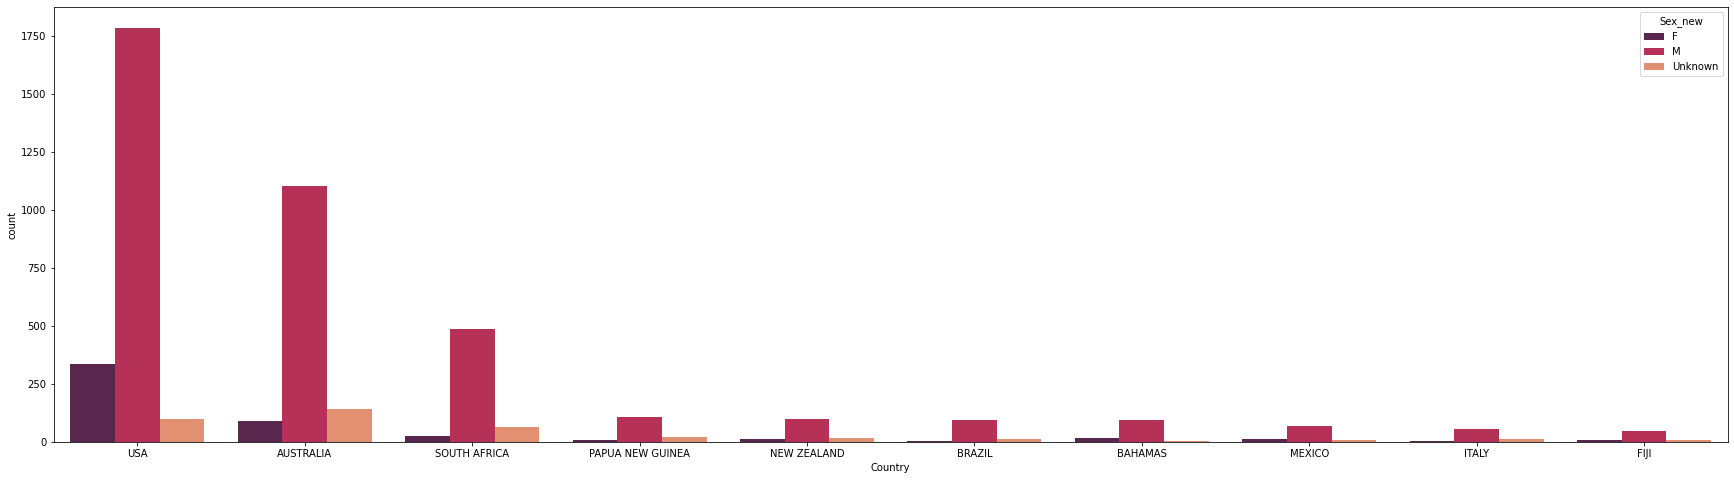

In [12]:
sns.countplot(x="Country", hue="Sex_new", data=df, palette="rocket",order=df.Country.value_counts().iloc[:10].index);

<font color='pink'> En esta gráfica podemos observar con claridad que la gran mayoría de víctimas en todos los páises han sido hombres.</font>

 ##### 2.3: ¿Qué edad recibe mayor número de ataques? 
   - 💡 Pista 💡 Para que esta gráfica nos salga legible tendremos que crear antes grupos de edad. 

<font color='orange'> En este ejercicio nos enfrentamos al primer problema, los valores de la columna 'Age' están muy sucios. Tienen NaN, ints, strings y floats. Para poder trabajar con esta columna y realizar las agrupaciones para la posterior gráfica primero tenemos que igualarlos y limpiarlos.</font>

In [5]:
df['Age'] = df['Age'].astype(str)

In [6]:
patron_edades = r'\d+'  

In [7]:
def sacar_edades(col):
    patron_edades = r'\d+'
    x = re.findall(patron_edades, col)
    if len(x) > 0:
        return int(x[0])
    else:
        return np.nan

In [8]:
df['age_new'] = df['Age'].apply(sacar_edades)

In [10]:
df.sample(2)

,Case Number,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Time,Species,Fatal (Y/N),Injury,Date,age_new
3354,1971.04.11,1971.0,Unprovoked,SOUTH AFRICA,Western Cape Province,Buffels Bay,Swimming,Theo Klein,M,>50,11h30,White shark according to tooth pattern and wit...,Y,"FATAL, multiple bites",11-Apr-1971,50.0
876,2011.08.18,2011.0,Unprovoked,RUSSIA,"Peter the Great Bay, Khasan, Primorsky Krai (F...",Zheltukhin Island,Swimming,Valery Sidorovich,M,16,NaN,NaN,N,"Lacerations to hip, thigh and knee",18-Aug-2011,16.0


<font color='orange'>Limpiamos la columna Age y comprobamos que se ha hecho bien. Ahora podremos hacer los bins para agrupar los datos y hacer nuestra gráfica.

In [15]:
df['age_groups'] = pd.cut(df['age_new'], 10)

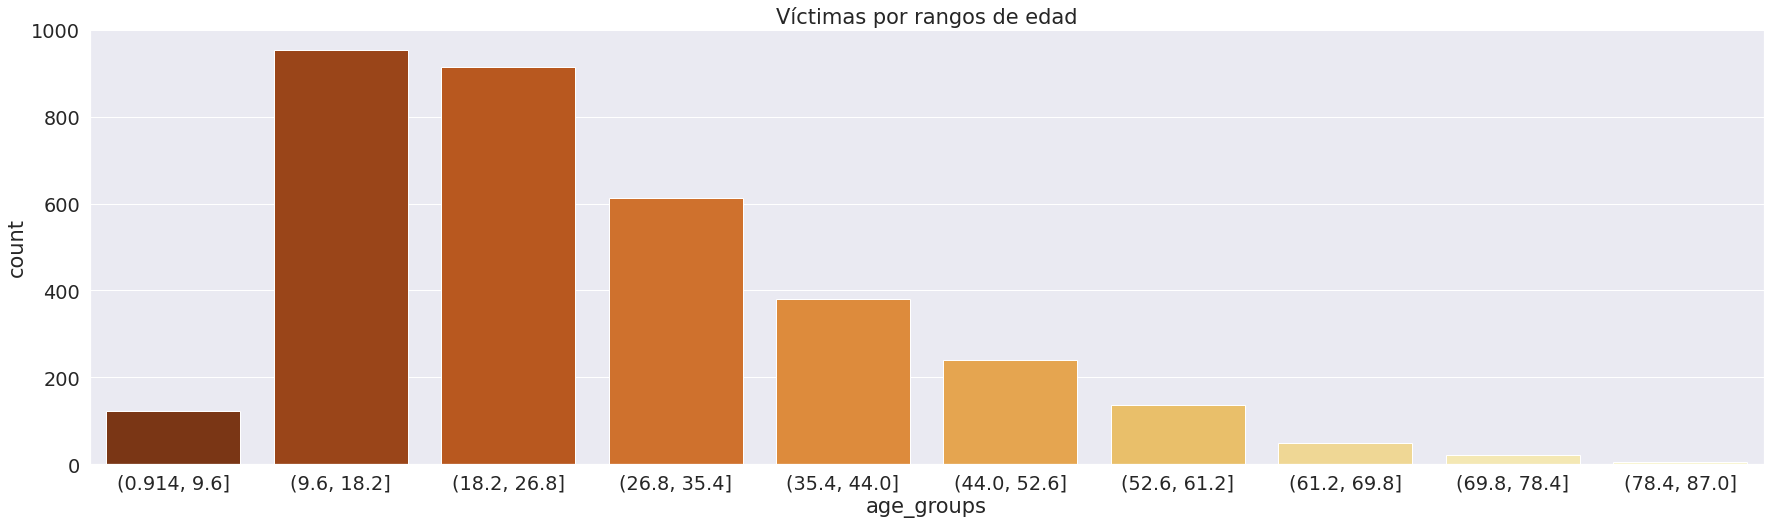

In [22]:
sns.set(font_scale = 1.75)
sns.countplot(x="age_groups", data=df, palette="YlOrBr_r")
plt.title('Víctimas por rangos de edad');


<font color='orange'> En el countplot que obtenemos vemos que las edades de la mayoría de las víctimas de ataques de tiburones oscilan entre los 9 y los 27 años. Podemos ver también que las personas mayores de 69 años son las que menos ataques han sufrido.

 ##### 2.4: Ataques entre sexos, ¿hay diferencia?

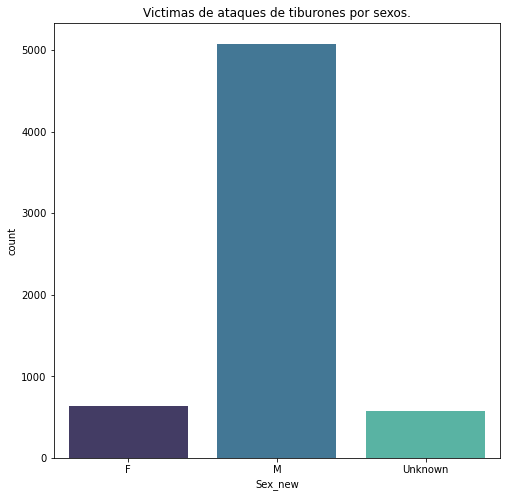

In [62]:
plt.figure(figsize=(8,8))
plt.title('Victimas de ataques de tiburones por sexos.')
sns.countplot(x="Sex_new", data=df, palette = 'mako');

<font color='cyan'> Vemos claramente que sí existe una gran diferencia en los ataques, siendo los hombres las principales víctimas. 🦿</font>

##### 2.5: ¿Cuando ocurren más ataques? ¿Os sale algo raro en la gráfica? Intentad limpiar un poco los datos para que os salga mejor.

<font color='violet'> Para este ejercicio extraeremos el patrón del mes con las tres primeras letras. Hemos observado que hay entradas muy diferentes, pero la mayoría tienen formato DD-MM-AAAA o MM-AAAA.</font>

In [14]:
date = df['Date'].astype(str)

In [16]:
patron = r'(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)'

In [17]:
meses = []

def meses_tiburon(col):
    x = re.findall(patron, col)
    try:
        return x[0]
    except:
        return 'unspecified'

In [18]:
df['Date_new'] = df['Date'].apply(meses_tiburon)

In [20]:
df.head(1)

,Case Number,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Time,Species,Fatal (Y/N),Injury,Date,Sex_new,Date_new
0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018,F,Jun


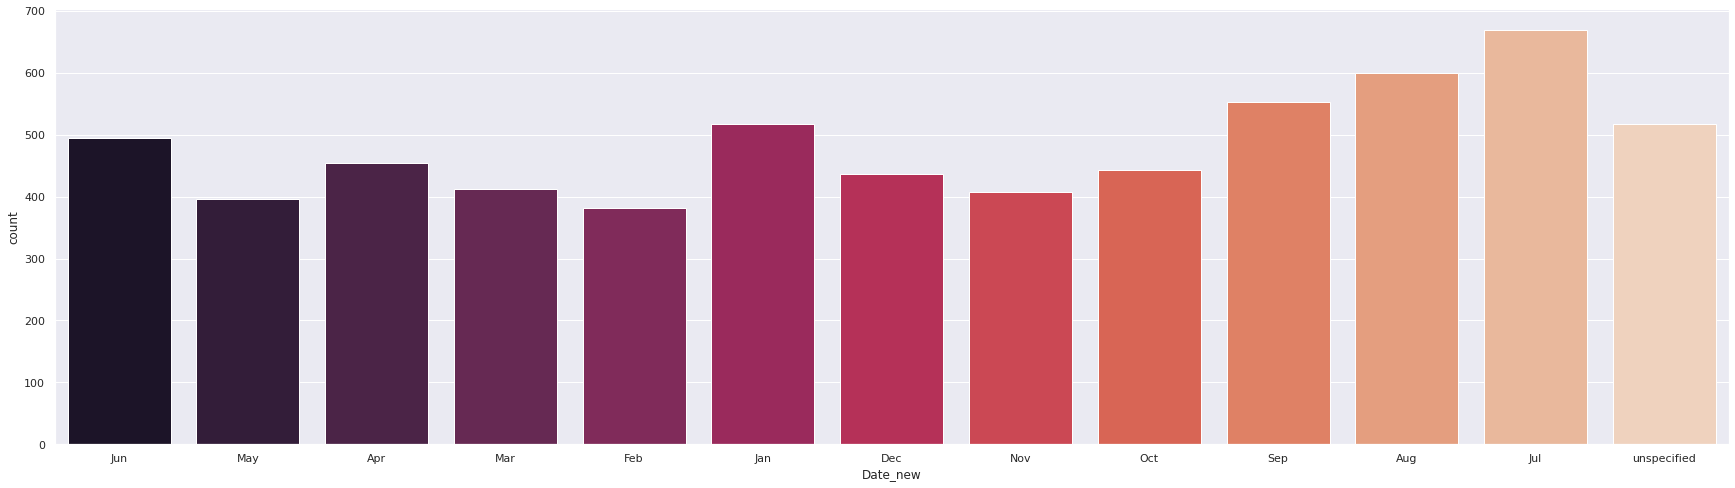

In [32]:
sns.countplot(x="Date_new", data=df, palette="rocket")
sns.set(font_scale = 2);

<font color='violet'> En la gráfica podemos ver que ocurren más ataques en el mes de julio, seguido de agosto y septiembre 🏖. Esto se debe a que en los meses de verano mucha más gente frecuenta playas y se baña más que en otros meses, aunque se debe destacar que el siguiente mes con más ataques despúes de los meses de verano es enero, por encima de julio.</font>